# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [552]:
# libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import time

# load and show dataset for twitter 
twitter_archive_dataset = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive_dataset.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [553]:
import requests

#download image-prediction.tsv file
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save HTML to file
with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)
    
#showing data in the image file
image_predictions_dataset = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions_dataset.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [554]:
# Get the tweet_json data
with open('tweet_json.txt','r') as json_file:
    file=[]
    for line in json_file:
        lines = line.replace('\n','')
        file.append(lines)
length_of_line = len(file)
tweet_id = []
retweet_count = []
likes_count = []
dataset = {'tweet_id':[],'retweet_count':[],'favorite_count':[]}
for i in range(length_of_line):
    dictionary = json.loads(file[i])
    tweet_id.append(dictionary['id'])
    retweet_count.append(dictionary['retweet_count'])
    likes_count.append(dictionary['favorite_count'])
dataset.update({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':likes_count})
tweet_json_df = pd.DataFrame(dataset)

In [555]:
# Show the data
tweet_json_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter_archive_dataset

In [556]:
# Show the data
twitter_archive_dataset.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [557]:
# Check for information about this dataset
twitter_archive_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [558]:
# Check for uniqueness
twitter_archive_dataset.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

This dataset contains columns that are not needed in this work. It also contains a lot of null or missing values.

In [559]:
# Check for duplicates
twitter_archive_dataset.duplicated().sum()

0

In [560]:
# check for number of missing values
twitter_archive_dataset.isnull().sum().sum()

11140

In [561]:
# describe the data
twitter_archive_dataset.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [562]:
# Check the number of the various types of dogs we have in the dataset
twitter_archive_dataset.groupby(["doggo", "puppo", "pupper", "floofer"]).size().reset_index().rename(columns={0: "count"})

,doggo,puppo,pupper,floofer,count
0,None,None,None,None,1976
1,None,None,None,floofer,9
2,None,None,pupper,None,245
3,None,puppo,None,None,29
4,doggo,None,None,None,83
5,doggo,None,None,floofer,1
6,doggo,None,pupper,None,12
7,doggo,puppo,None,None,1


In [563]:
twitter_archive_dataset.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [564]:
# Checking for some erroneous names
twitter_archive_dataset[twitter_archive_dataset['name']=='the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1527,690360449368465409,NaN,NaN,2016-01-22 02:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Stop sending in lobsters. This is the final wa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690360449...,9,10,the,None,None,None,None
1603,685943807276412928,NaN,NaN,2016-01-09 21:58:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the newly formed pupper a capella grou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685943807...,8,10,the,None,None,pupper,None
1797,677269281705472000,NaN,NaN,2015-12-16 23:29:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest pupper I've ever seen. 10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677269281...,10,10,the,None,None,pupper,None
1815,676613908052996102,NaN,NaN,2015-12-15 04:05:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the saddest/sweetest/best picture I've...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676613908...,12,10,the,None,None,None,None
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


### Image_predictions_dataset

In [565]:
# Check the data
image_predictions_dataset.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [566]:
# Check for information about the dataset
image_predictions_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


By observation, this dataset has no missing values

In [567]:
# Check for duplicates
image_predictions_dataset.duplicated().sum()

0

In [568]:
# Describe the data
image_predictions_dataset.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Tweet_json_df

In [569]:
# check the data
tweet_json_df.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [570]:
# Get info about this data
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [571]:
# Check for missing values
tweet_json_df.isnull().sum().sum()

0

In [572]:
# Describe the data
tweet_json_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


### Quality issues
1. some columns contained a lot of missing data in twitter-archive-enhanced.csv.

2. some columns in twitter-archive-enhanced.csv were irrelevant to my analysis.

3. Change tweet_id from an integer to a string (twitter-archive-enhanced.csv).

4. Timestamp column is not of datetime format (twitter-archive-enhanced.csv).

5. Wrong Datatype img_num Column should be in string (image-prediction.tsv).

6. Change numerator and denominator datatype to float in twitter dataset (twitter-archive-enhanced.csv).

7. Correct column containing invalid names (twitter-archive-enhanced.csv).

8. Create a column called rating to standardize the ratings (twitter-archive-enhanced.csv).

### Tidiness issues
1. Merge the dog columns into one.

2. Merge the three datasets into a big data (master data).

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [573]:
# Make copies of original pieces of data
twitter = twitter_archive_dataset.copy()
image = image_predictions_dataset.copy()
json = tweet_json_df.copy()

### Quality Issues

#### 1. some colums in twitter-archive-enchanced.csv contain missing data.


#### Define:
* Delete retweets as instructed in the project instruction

* Drop all columns in twitter-archive-enhanced.csv that contains missing data

#### Code

In [574]:
# Delete retweets
twitter = twitter[twitter.retweeted_status_id.isnull()]
twitter = twitter[twitter.retweeted_status_user_id.isnull()]
twitter = twitter[twitter.retweeted_status_timestamp.isnull()]

In [575]:
# Check whether all retweets are removed
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [576]:
# Drop all columns with a lot of missing data
twitter = twitter.drop([
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp' 
                                                    ], 1)

C:\Users\JUSTIC~1\AppData\Local\Temp/ipykernel_6676/345480581.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  twitter = twitter.drop([


#### Test

In [577]:
#check data
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB



#### 2. some columns are irrelevant to my analysis.

#### Define
Drop irrelevant columns

#### Code

In [578]:
# Drop expanded_urls
twitter = twitter.drop(['expanded_urls'], axis=1)

#### Test

In [579]:
# Check if the the column is dropped
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


#### 3. Change tweet_id from integer to string

#### Define
Change tweet_id from integer to string

#### Code

In [580]:
# Change tweet_id from integer to string
twitter['tweet_id'] = twitter['tweet_id'].astype(str)

#### Test

In [581]:
# Check if datatype has changed from integer to string
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(2), object(9)
memory usage: 203.9+ KB


#### 4. Timestamp column is not of datetime format.

#### Define
Change timestamp to datetime format.

#### Code 

In [582]:
# Change the timestamp column in twitter dataset to datetime format
twitter['timestamp'] = pd.to_datetime(twitter['timestamp'], format = "%Y-%m-%d ")

#### Test

In [583]:
# Check whether the code materialized
twitter['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

#### 5. Wrong Datatype img_num Column in the image file should be in string.

#### Define
we can convert the dataype using .ASTYPE() method

#### Code

In [584]:
# Change the img_num datatype to string
image['img_num'] = image['img_num'].astype(str)

#### Test

In [585]:
# Check the index or column the img_num dataset is
image.columns.get_loc("img_num")

2

In [586]:
# Use iloc and the index or column number to check the datatype
type(image.iloc[0,2])

str

#### 6. Change numerator and denominator datatype to float in twitter dataset
#### Define
correct numerator and denominator datatype
#### Code

In [587]:
# Change numerator and denominator datatype
twitter[['rating_numerator', 'rating_denominator']] = twitter[['rating_numerator','rating_denominator']].astype(float)

#### Test

In [588]:
# Check the datatype of the dataset
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   float64            
 5   rating_denominator  2175 non-null   float64            
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), object(8)
memory usage: 203.9+ KB


#### 7. Correct columns with invalid names
#### Define
The name column in twitter dataset contains names like "the", "a",etc. Clearly these are not names and has to change. I will replace them with "NaN" or "None".
#### Code

In [589]:
# correct erroneous names
mask = twitter.name.str.islower() 
column_name = 'name' 
twitter.loc[mask, column_name] = np.nan

#### Test

In [590]:
# Checking for existence of erroneous names like "the"
twitter[twitter['name']=='the']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [591]:
# Checking for existence of erroneous names like "a"
twitter[twitter['name']== 'a']

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 8. Create a column called rating to standardize the ratings
#### Define
Create a column called rating using the rating_numerator and rating_denominator
#### Code

In [592]:
# Creating rating column
twitter['rating'] = twitter['rating_numerator'] / twitter['rating_denominator']

#### Test

In [593]:
# Check the rating column
twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,1.2


### Tidyness issues

#### 1. Merge the dog column into one
#### Define
Create a single column for all the dog types.
Drop the columns for the various dog types.
#### Code

In [594]:
# Extract the text from the columns into the new dog_type column
twitter.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [595]:
# Replace None and NaN
twitter.doggo.replace('None', '', inplace=True) 
twitter.doggo.replace(np.NaN, '', inplace=True)
twitter.floofer.replace('None', '', inplace=True) 
twitter.floofer.replace(np.NaN, '', inplace=True)
twitter.pupper.replace('None', '', inplace=True) 
twitter.pupper.replace(np.NaN, '', inplace=True)
twitter.puppo.replace('None', '', inplace=True) 
twitter.puppo.replace(np.NaN, '', inplace=True)

In [596]:
# Create a column dog_type for all dog columns. Afterwards create another column dogtype.
# Define rows dog_type column with multiple dog types as "multiple" and put them together with all the other dog types into dogtype column.
twitter['dog_type'] = twitter.doggo + twitter.floofer + twitter.pupper + twitter.puppo
twitter.loc[twitter.dog_type == 'doggopupper', 'dogtype'] = 'multiple'
twitter.loc[twitter.dog_type == 'doggopuppo', 'dogtype'] = 'multiple'
twitter.loc[twitter.dog_type == 'doggofloofer', 'dogtype'] = 'multiple'
twitter.loc[twitter.dog_type == 'doggo', 'dogtype'] = 'doggo'
twitter.loc[twitter.dog_type == 'puppo', 'dogtype'] = 'puppo'
twitter.loc[twitter.dog_type == 'floofer', 'dogtype'] = 'floofer'
twitter.loc[twitter.dog_type == 'pupper', 'dogtype'] = 'pupper'

In [597]:
# Value counts for the various dog types in dog_type column
twitter.dog_type.value_counts()

                1831
pupper           224
doggo             75
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [598]:
# Value counts for the various dog types in dogtype column
twitter.dogtype.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dogtype, dtype: int64

In [599]:
# Check for uniqueness
twitter.dogtype.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'multiple'],
      dtype=object)

In [600]:
# Check data
twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,dog_type,dogtype
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,,,,1.3,,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,,,,1.3,,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,,,,1.2,,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,,,,1.3,,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,,,,1.2,,NaN


In [601]:
# Drop previous compound dog type column
twitter= twitter.drop(['dog_type'] , axis =1)

In [602]:
# drop the following columns: doggo, floofer, pupper, puppo
twitter.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [603]:
# Check dogtype dataset
twitter.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dogtype
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,1.2,NaN


#### 2. Merge the three datasets into a big data (master data).
#### Define
Merge the three datasets using the pandas concat() command. Drop duplicated columns.
#### Code

In [604]:
# Merging the three datasets
master_dataset = pd.concat([twitter, image, json], join='outer', axis=1)

In [605]:
# Drop duplicated columns
master_dataset = master_dataset.loc[:,~master_dataset.columns.duplicated()]

In [606]:
# Check dataset
master_dataset.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dogtype,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,1.3,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,1.3,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,1.2,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,1.3,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,1.2,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,9774.0,41048.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [607]:
master_dataset.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [608]:
# load my saved data assigning it a different name df_1
df_1 = pd.read_csv('twitter_archive_master.csv')

In [609]:
# Check the dataset
df_1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,dogtype,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,8.924206e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,1.3,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8853.0,39467.0
1,8.921774e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,1.3,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,6514.0,33819.0
2,8.918152e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,1.2,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,4328.0,25461.0
3,8.916896e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,1.3,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8964.0,42908.0
4,8.913276e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,1.2,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,9774.0,41048.0


In [610]:
# Get information about dataset
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   float64
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   rating_numerator    2175 non-null   float64
 5   rating_denominator  2175 non-null   float64
 6   name                2071 non-null   object 
 7   rating              2175 non-null   float64
 8   dogtype             344 non-null    object 
 9   jpg_url             2075 non-null   object 
 10  img_num             2075 non-null   float64
 11  p1                  2075 non-null   object 
 12  p1_conf             2075 non-null   float64
 13  p1_dog              2075 non-null   object 
 14  p2                  2075 non-null   object 
 15  p2_conf             2075 non-null   float64
 16  p2_dog

In [611]:
# Which dog type appeared most?
df_1.dogtype.value_counts()

pupper      224
doggo        75
puppo        24
multiple     12
floofer       9
Name: dogtype, dtype: int64

In [612]:
# Which source had the most tweets?
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [613]:
# Which image number was used to predict most of the dog types?
df_1.img_num.value_counts()

1.0    1780
2.0     198
3.0      66
4.0      31
Name: img_num, dtype: int64

In [614]:
# Which dog type had the most rating?
df_1.groupby('dogtype')['rating'].value_counts()

dogtype   rating
doggo     1.3       21
          1.1       20
          1.2       15
          1.0        8
          1.4        8
          0.8        3
floofer   1.2        3
          1.3        3
          1.1        2
          1.0        1
multiple  1.2        6
          1.1        2
          1.3        2
          0.5        1
          1.0        1
pupper    1.2       55
          1.0       52
          1.1       52
          1.3       18
          0.9       16
          0.8       12
          0.7        8
          1.4        7
          0.3        1
          0.5        1
          0.6        1
          2.7        1
puppo     1.3       10
          1.2        7
          1.0        3
          1.1        2
          0.9        1
          1.4        1
Name: rating, dtype: int64

### Insights:
1. Most of the dogs were puppers.

2. Most of the tweets were sent from an iPhone.

3. Most of the dog breeds were predicted using the first image or image 1.

### Visualization

Text(0, 0.5, 'number of dogs')

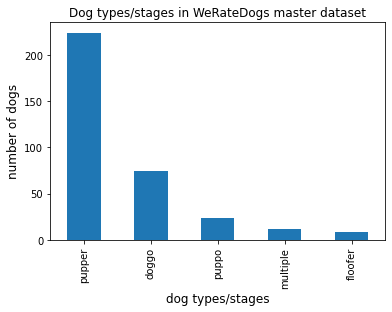

In [615]:
# Visual proof of the fact that puppers were the most 
df_1.dogtype.value_counts().plot(kind= 'bar');
plt.title('Dog types/stages in WeRateDogs master dataset', fontsize=12)
plt.xlabel('dog types/stages', fontsize=12)
plt.ylabel('number of dogs', fontsize=12)

Text(0, 0.5, 'tweet sources')

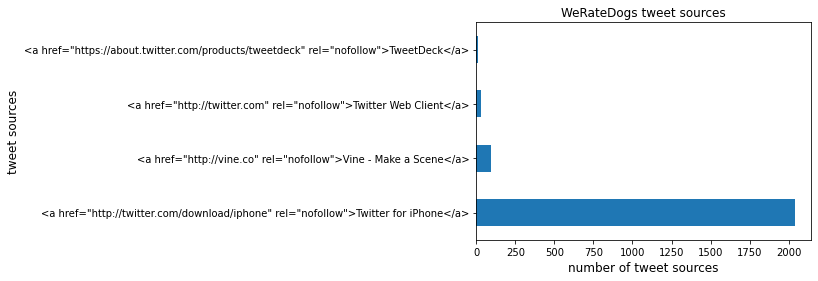

In [616]:
# Visual proof of the fact that most tweets were from iphone 
df_1.source.value_counts().plot(kind='barh')
plt.title('WeRateDogs tweet sources', fontsize=12)
plt.xlabel('number of tweet sources', fontsize=12)
plt.ylabel('tweet sources', fontsize=12)

Text(0, 0.5, 'number of dog predictions')

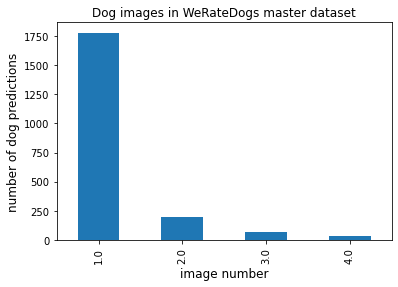

In [617]:
# Visual proof of the fact that most dog breeds were from image number 1. 
df_1.img_num.value_counts().plot(kind='bar')
plt.title('Dog images in WeRateDogs master dataset', fontsize=12)
plt.xlabel('image number', fontsize=12)
plt.ylabel('number of dog predictions', fontsize=12)

In [618]:
def relationship_btw(var1, var2):
    plt.scatter(x=df_1[var1], y=df_1[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.title(f'{var1} against {var2}')

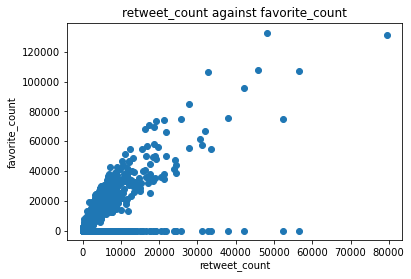

In [619]:
relationship_btw('retweet_count', 'favorite_count')